In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_11d6882aba4a4088b92e5b1911d45304 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9I08M66-7pxgflgP02bnV5tKe91ldSKSTN4fQUkCVj5P',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_11d6882aba4a4088b92e5b1911d45304.get_object(Bucket='fooddemandupdated-donotdelete-pr-bcwyxgwvg1gbx2',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

center = pd.read_csv(body)
center.head()


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [3]:

body = client_11d6882aba4a4088b92e5b1911d45304.get_object(Bucket='fooddemandupdated-donotdelete-pr-bcwyxgwvg1gbx2',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

meal = pd.read_csv(body)
meal.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [4]:

body = client_11d6882aba4a4088b92e5b1911d45304.get_object(Bucket='fooddemandupdated-donotdelete-pr-bcwyxgwvg1gbx2',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:

body = client_11d6882aba4a4088b92e5b1911d45304.get_object(Bucket='fooddemandupdated-donotdelete-pr-bcwyxgwvg1gbx2',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


##### Data Pre-Processing

In [6]:
print("The Shape of Demand dataset :",data.shape)
print("The Shape of Fulmilment Center Information dataset :",center.shape)
print("The Shape of Meal information dataset :",meal.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)
The Shape of Test dataset : (32573, 8)


In [7]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [8]:
test['num_orders']=123456 ### Assigning random number for Target Variable of Test Data.

In [9]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,123456
1,1127204,146,55,1993,160.11,159.11,0,0,123456
2,1212707,146,55,2539,157.14,159.14,0,0,123456
3,1082698,146,55,2631,162.02,162.02,0,0,123456
4,1400926,146,55,1248,163.93,163.93,0,0,123456


In [10]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [11]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [12]:
data=pd.concat([data,test],axis=0)

In [13]:
data.shape

(489121, 9)

In [14]:
data=data.merge(center,on='center_id',how='left')

In [15]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,1250239,155,61,1543,482.09,484.09,0,0,123456,473,77,TYPE_A,4.5
489117,1039516,155,61,2304,483.09,483.09,0,0,123456,473,77,TYPE_A,4.5
489118,1158107,155,61,2664,322.07,323.07,0,0,123456,473,77,TYPE_A,4.5
489119,1444235,155,61,2569,322.07,323.07,0,0,123456,473,77,TYPE_A,4.5


In [16]:
data=data.merge(meal,on='meal_id',how='left')

In [17]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [18]:
data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

##### Deriving New Features

In [19]:
#Discount Amount
data['discount amount']=data['base_price']-data['checkout_price']

In [20]:
#Discount Percent
data['discount percent'] = ((data['base_price']-data['checkout_price'])/data['base_price'])*100

In [21]:
#Discount Y/N
data['discount y/n'] = [1 if x>0 else 0 for x in (data['base_price']-data['checkout_price'])]

In [22]:
data=data.sort_values(['center_id', 'meal_id', 'week']).reset_index()

In [23]:
data.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n
0,2370,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,TYPE_B,6.3,Beverages,Italian,0.0,0.000000,0
1,5273,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,TYPE_B,6.3,Beverages,Italian,-1.0,-0.548366,0
2,8175,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,TYPE_B,6.3,Beverages,Italian,-2.0,-1.096732,0
3,11064,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,TYPE_B,6.3,Beverages,Italian,1.0,0.545375,1
4,13918,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,TYPE_B,6.3,Beverages,Italian,-2.0,-1.102597,0


In [24]:
data.isnull().sum()

index                    0
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
discount amount          0
discount percent         0
discount y/n             0
dtype: int64

##### Train Test Split

In [25]:
train=data[data['week'].isin(range(1,146))]
test=data[data['week'].isin(range(146,156))]

In [26]:
print("The Shape of Train dataset :",train.shape)
print("The Shape of Test dataset :",test.shape)

The Shape of Train dataset : (456548, 19)
The Shape of Test dataset : (32573, 19)


<AxesSubplot:>

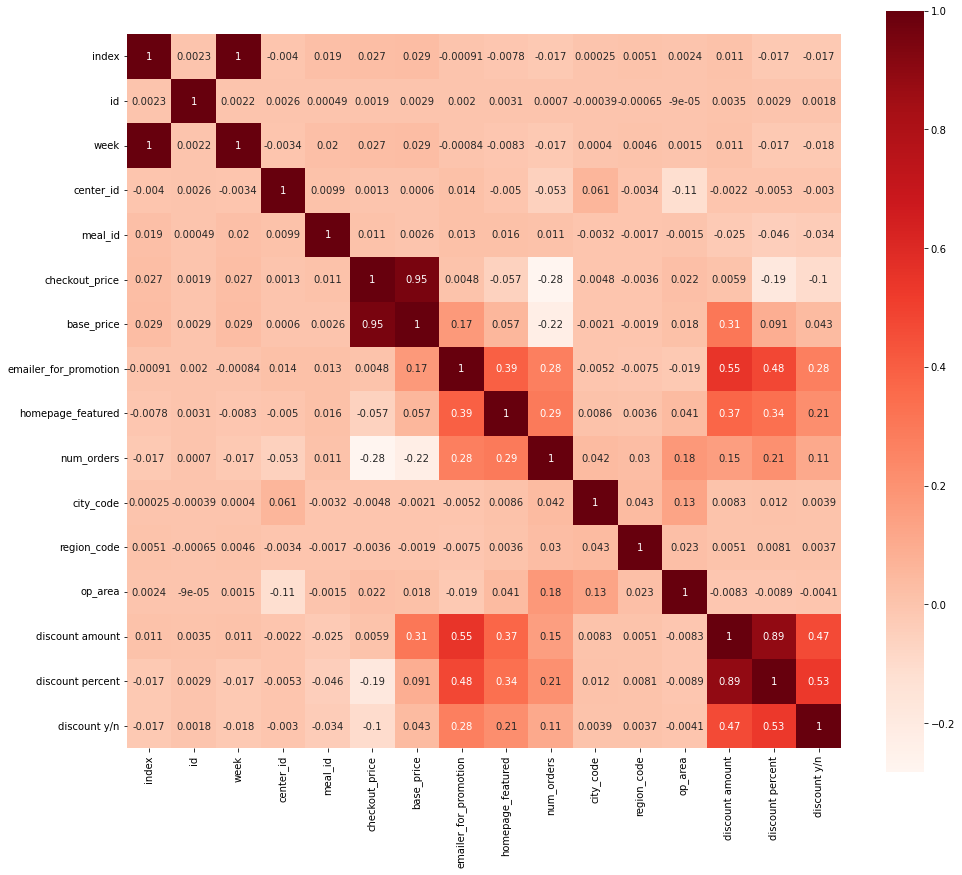

In [27]:
plt.figure(figsize=(16,14))
sns.heatmap(train.corr(),annot=True, square=True, cmap='Reds')

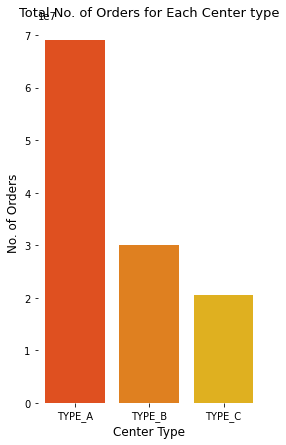

In [28]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=train.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Type_A Centers have the highest number of Orders placed and Type_C has the least.

In [29]:
train['center_id'].nunique()

77

The are are 77 Fullfilment Centers in total.

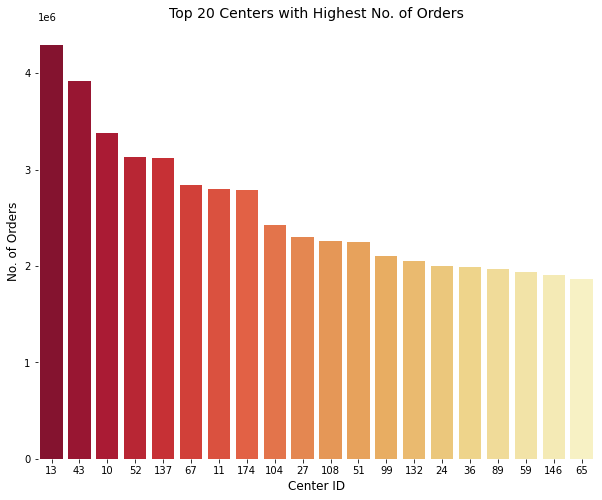

In [30]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Initially, when we checked, which Center Type has the highest number of Orders, We found that Center Type_A has the highest number of orders, but now when we check individually, we could see that Center 13 of Type_B has the highest number of Orders. Let’s analyze the reason behind that.

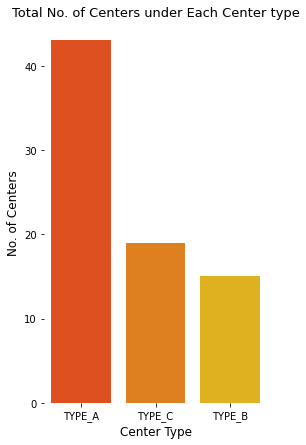

In [31]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Centers under Each Center type',fontdict={'fontsize':13})
sns.barplot(y=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts(), x=train.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts().index,palette='autumn');
plt.ylabel('No. of Centers',fontdict={'fontsize':12})
plt.xlabel('Center Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Type_A has the most number of orders because, Type_A has the most number of Centers - 43 Centers.

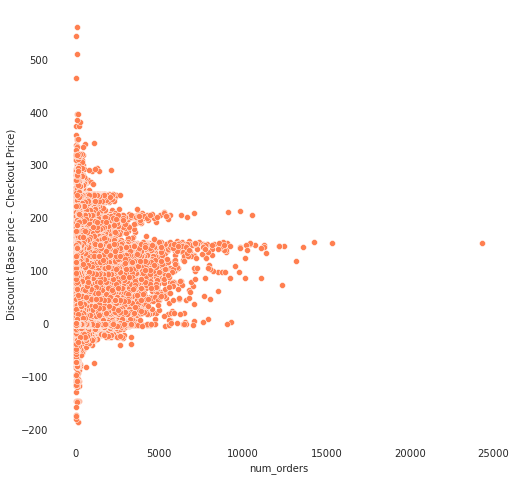

In [32]:
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.scatterplot(y=train['base_price']-train['checkout_price'],x=train['num_orders'],color='coral')
plt.ylabel('Discount (Base price - Checkout Price)')
sns.despine(bottom = True, left = True)

We created a new feature: Discount which is the difference of base price and checkout price and tried to find out if there is any relationship between the discount and the number of orders. But surprisingly there are no good correlation between the discount and the number of orders.

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

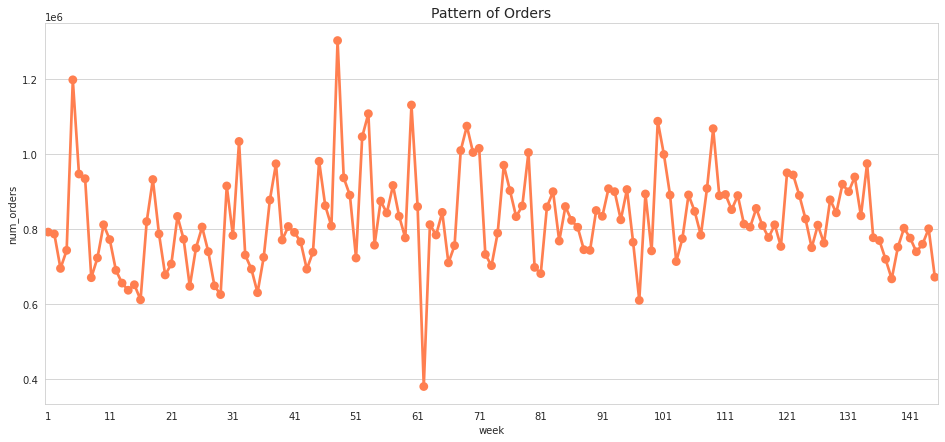

In [33]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders',fontdict={'fontsize':14})

sns.pointplot(x=train.groupby('week').sum().reset_index()['week'],y=train.groupby('week').sum().reset_index()['num_orders'],color='coral')
plt.xticks(range(0, 150, 10), list(np.arange(0,160,10)))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

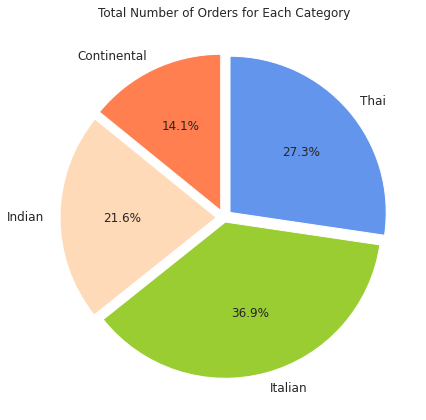

In [34]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train.groupby(['cuisine']).num_orders.sum(),
    labels=train.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

Italian Cuisine has the highest number of orders with Continental cuisine being the least.

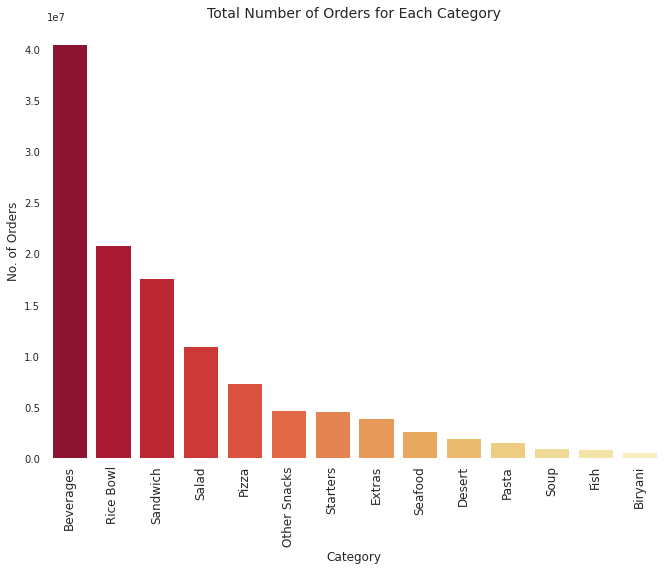

In [35]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


We could see that Beverages are the food category which has the higest number of orders and Biriyani is the food category with least number of orders.

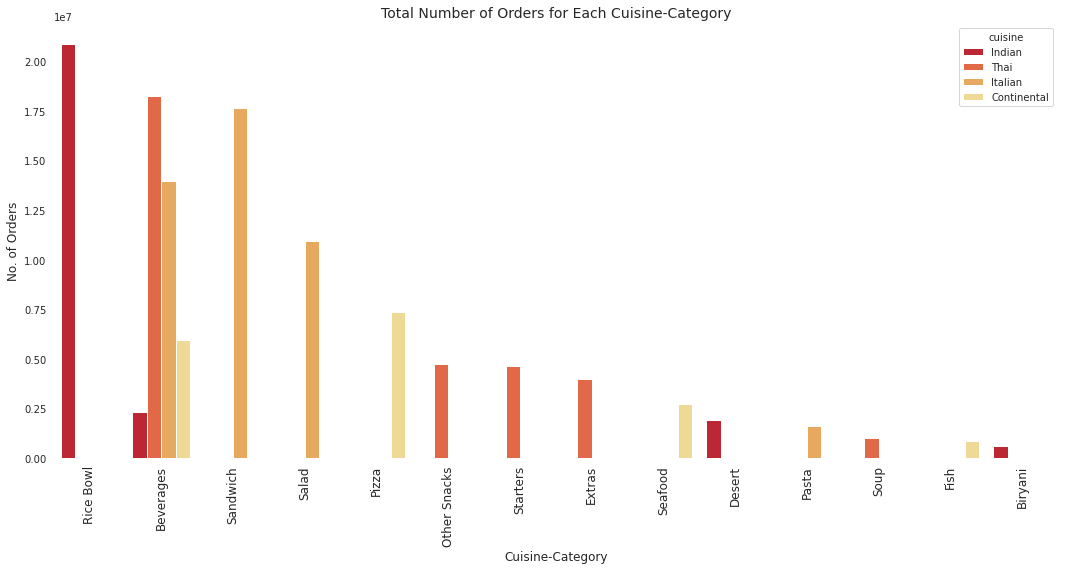

In [36]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='category',y='num_orders',data=train.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Similary when we checked which specific cuisne-food category has the highest number of orders, we could see that Indian-Rice Bowl has the highest number of orders and Indian-Biriyani has the least.

In [37]:
list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0])

[56, 34, 77, 85, 71, 23, 93, 35]

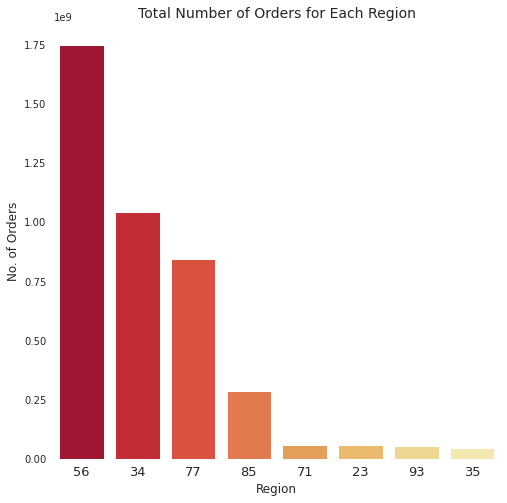

In [38]:
fig=plt.figure(figsize=(8,8))
sns.set_style("white")
plt.xticks(fontsize=13)
plt.title('Total Number of Orders for Each Region',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='region_code', data=data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0]));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Region',fontdict={'fontsize':12})
plt.xticks()
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to Region, we could see that Region - 56 has the highest number of orders - 60.5M orders which is almost 35M orders higher than the Region with second highest number of orders - Region 34 - 24M orders. 

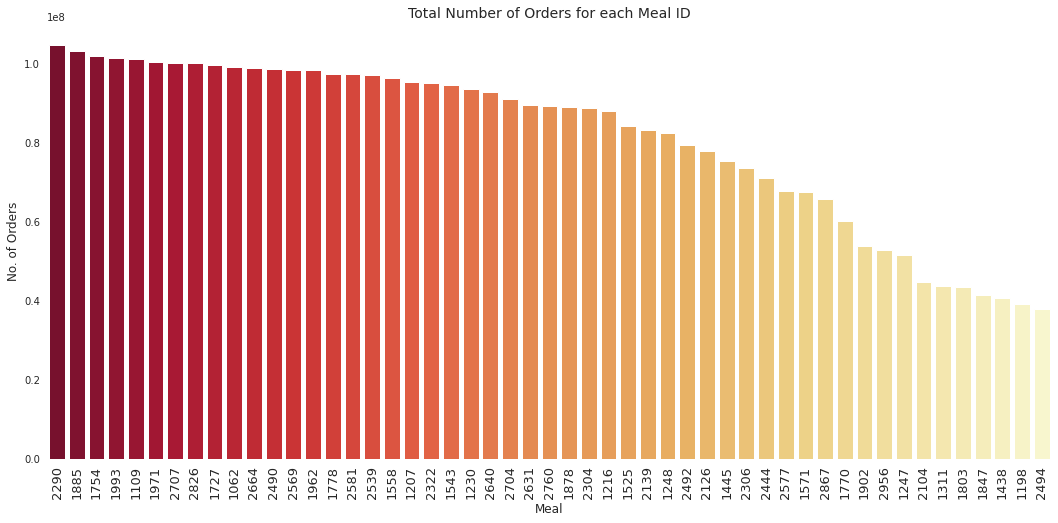

In [39]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each Meal ID',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='meal_id', data=data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(data.groupby('meal_id').num_orders.sum().sort_values(ascending=False).reset_index()['meal_id'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Meal',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Meal ID 2290 has the higest number of Orders. There is not much significant differences between number of orders for different Meal IDs.

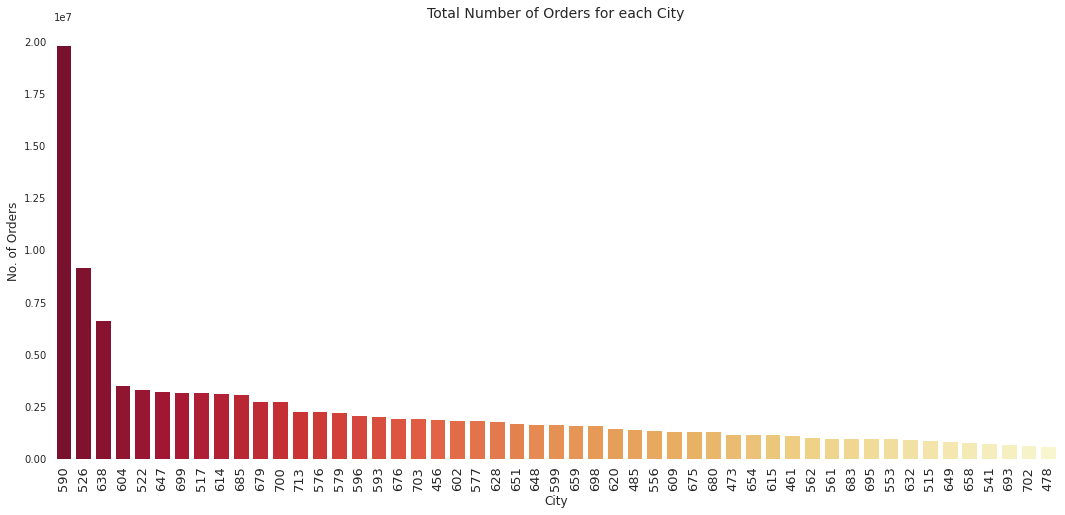

In [40]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=13)
plt.title('Total Number of Orders for each City',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='city_code', data=train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r',order=list(train.groupby('city_code').num_orders.sum().sort_values(ascending=False).reset_index()['city_code'].values));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('City',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);


Also when we checked the number of orders with respect to City, we could see that City - 590 has the highest number of orders - 18.5M orders which is almost 10M orders higher than the City with second highest number of orders - City 526 - 8.6M orders.

##### Encoding City 

As per our observation from our barchart of the City against the number of orders. There the high significant difference between the Top 3 cities which has the highest number of orders. Therefore, in our first approach we will encode the City with Highest No. of Orders as CH1, City with 2nd Highest No. of Orders as CH2 and City with 3rd Highest No. of Orders as CH3 and rest all of the cities which does not have much significant differences between the number of orders as CH4.

In [41]:
city4={590:'CH1', 526:'CH2', 638:'CH3'}
data['city_enc_4']=data['city_code'].map(city4)
data['city_enc_4']=data['city_enc_4'].fillna('CH4')

In [42]:
data['city_enc_4'].value_counts()

CH4    362341
CH1     58708
CH2     46589
CH3     21483
Name: city_enc_4, dtype: int64

In [43]:
data.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,city_enc_4
0,2370,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,TYPE_B,6.3,Beverages,Italian,0.0,0.000000,0,CH1
1,5273,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,TYPE_B,6.3,Beverages,Italian,-1.0,-0.548366,0,CH1
2,8175,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,TYPE_B,6.3,Beverages,Italian,-2.0,-1.096732,0,CH1
3,11064,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,TYPE_B,6.3,Beverages,Italian,1.0,0.545375,1,CH1
4,13918,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,TYPE_B,6.3,Beverages,Italian,-2.0,-1.102597,0,CH1


In [44]:
data.isnull().sum()

index                    0
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
discount amount          0
discount percent         0
discount y/n             0
city_enc_4               0
dtype: int64

##### Copying to New DataFrame

In [45]:
datax=data.copy()
datax.head()

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount percent,discount y/n,city_enc_4
0,2370,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,TYPE_B,6.3,Beverages,Italian,0.0,0.000000,0,CH1
1,5273,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,TYPE_B,6.3,Beverages,Italian,-1.0,-0.548366,0,CH1
2,8175,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,TYPE_B,6.3,Beverages,Italian,-2.0,-1.096732,0,CH1
3,11064,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,TYPE_B,6.3,Beverages,Italian,1.0,0.545375,1,CH1
4,13918,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,TYPE_B,6.3,Beverages,Italian,-2.0,-1.102597,0,CH1


##### Enoding all the Categorical Features

In [46]:
datax['center_id']=datax['center_id'].astype('object')
datax['meal_id']=datax['meal_id'].astype('object')
datax['region_code']=datax['region_code'].astype('object')

In [47]:
datax['center_id'].unique()

array([10, 11, 13, 14, 17, 20, 23, 24, 26, 27, 29, 30, 32, 34, 36, 39, 41,
       42, 43, 50, 51, 52, 53, 55, 57, 58, 59, 61, 64, 65, 66, 67, 68, 72,
       73, 74, 75, 76, 77, 80, 81, 83, 86, 88, 89, 91, 92, 93, 94, 97, 99,
       101, 102, 104, 106, 108, 109, 110, 113, 124, 126, 129, 132, 137,
       139, 143, 145, 146, 149, 152, 153, 157, 161, 162, 174, 177, 186],
      dtype=object)

In [48]:

datax['meal_id'].unique()

array([1062, 1109, 1198, 1207, 1216, 1230, 1247, 1248, 1311, 1438, 1445,
       1525, 1543, 1558, 1571, 1727, 1754, 1770, 1778, 1803, 1847, 1878,
       1885, 1902, 1962, 1971, 1993, 2104, 2126, 2139, 2290, 2304, 2306,
       2322, 2444, 2490, 2492, 2494, 2539, 2569, 2577, 2581, 2631, 2640,
       2664, 2704, 2707, 2760, 2826, 2867, 2956], dtype=object)

In [49]:
datax['region_code'].unique()

array([56, 23, 85, 77, 34, 35, 71, 93], dtype=object)

In [50]:
datax['center_type'].unique()

array(['TYPE_B', 'TYPE_A', 'TYPE_C'], dtype=object)

In [51]:
datax['category'].unique()

array(['Beverages', 'Rice Bowl', 'Extras', 'Pasta', 'Biryani', 'Soup',
       'Seafood', 'Other Snacks', 'Desert', 'Pizza', 'Fish', 'Sandwich',
       'Starters', 'Salad'], dtype=object)

In [52]:
datax['cuisine'].unique()

array(['Italian', 'Indian', 'Thai', 'Continental'], dtype=object)

In [53]:
datax['city_enc_4'].unique()

array(['CH1', 'CH4', 'CH2', 'CH3'], dtype=object)

In [54]:
obj=datax[['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4']]
num=datax.drop(['center_id','meal_id','region_code','center_type','category','cuisine','city_enc_4'],axis=1)

In [55]:
encode1=pd.get_dummies(obj,drop_first = False)

In [56]:
datax=pd.concat([num,encode1],axis=1)

In [57]:
datax.head()

,index,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount amount,discount percent,discount y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
0,2370,1436842,1,181.39,181.39,0,0,865,590,6.3,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,5273,1205013,2,183.36,182.36,0,0,782,590,6.3,-1.0,-0.548366,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,8175,1447751,3,184.36,182.36,0,0,851,590,6.3,-2.0,-1.096732,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,11064,1014968,4,182.36,183.36,0,0,1202,590,6.3,1.0,0.545375,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,13918,1003563,5,183.39,181.39,0,0,958,590,6.3,-2.0,-1.102597,0,1,0,0,0,0,0

In [58]:
abs(train.corr()['num_orders']).sort_values(ascending=False)

num_orders               1.000000
homepage_featured        0.294490
checkout_price           0.282108
emailer_for_promotion    0.277147
base_price               0.222306
discount percent         0.205188
op_area                  0.176976
discount amount          0.152950
discount y/n             0.111766
center_id                0.053035
city_code                0.041596
region_code              0.029744
index                    0.017438
week                     0.017210
meal_id                  0.010597
id                       0.000702
Name: num_orders, dtype: float64

In [59]:
datax.shape

(489121, 174)

##### Base Model

Building base model by splitting the last 10 week of the train dataset as test.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
train=datax[datax['week'].isin(range(1,136))]
test=datax[datax['week'].isin(range(136,146))]

X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=test['num_orders']

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.49277090044649197
Test Score : 0.5063209171967935
R squared : 0.5063209171967935
RMSE : 194.34107750959524


##### Linear Model 2 : Applying Standard Scaling & Log Transformation

In [62]:
sc=StandardScaler()

cat=datax.drop(['checkout_price','base_price','discount amount','discount percent'],axis=1)
num=datax[['checkout_price','base_price','discount amount','discount percent']]
scal= pd.DataFrame(sc.fit_transform(num),columns=num.columns)
datas=pd.concat([scal,cat],axis=1)

train=datas[datas['week'].isin(range(1,136))]
test=datas[datas['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week'],axis=1)
y_train=np.log(train['num_orders']) #Applying Log Transformation on the Target Feature

X_test=test.drop(['id','num_orders','week'],axis=1)
y_test=np.log(test['num_orders']) #Applying Log Transformation on the Target Feature

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.7273677887305604
Test Score : 0.7029756899622102
R squared : 0.7029756899622102
RMSLE : 0.6350444661804145


##### Copying to New DataFrame

In [63]:
datay=datas.copy()

In [64]:
datay['Quarter']=(datas['week']/13).astype('int64')

In [65]:
datay['Quarter'] = datay['Quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})

In [66]:
datay['Quarter'].value_counts()

Q4    124839
Q3    124225
Q2    122386
Q1    117671
Name: Quarter, dtype: int64

In [67]:
datay['Year']=(datas['week']/52).astype('int64')

In [68]:
datay['Year'] = datay['Year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3'})

In [69]:
objy=datay[['Quarter', 'Year']]
numy=datay.drop(['Quarter', 'Year'],axis=1)

encode1y=pd.get_dummies(objy,drop_first = False)
encode1y.head()

datay=pd.concat([numy,encode1y],axis=1)

In [70]:
datay.head()

,checkout_price,base_price,discount amount,discount percent,index,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,-0.989984,-1.078392,-0.446738,-0.497726,2370,1436842,1,0,0,865,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
1,-0.977110,-1.072342,-0.467581,-0.546214,5273,1205013,2,0,0,782,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.970575,-1.072342,-0.488425,-0.594702,8175,1447751,3,0,0,851,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,-0.983645,-1.066106,-0.425894,-0.449503,11064,1014968,4,0,0,1202,590,6.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
datay.shape

(489121, 181)

##### Applying Log Transformation on the Target Feature

In [72]:
datay['num_orders']=np.log1p(datay['num_orders'])

In [73]:
'''train=datay[datay['week'].isin(range(1,146))]
def outliers_3(col):
    q3=round(train[col].quantile(0.75),6)
    q1=round(train[col].quantile(0.25),6)
    iqr=q3-q1
    lw = q1 - (3*iqr)
    hw = q3 + (3*iqr)  
    uo=train[train[col]>hw].shape[0]
    lo=train[train[col]<lw].shape[0]
    print('Number of Upper Outliers :',uo)
    print('Number of Lower Outliers :',lo)
    print('Percentage of Outliers :',((uo+lo)/train.shape[0])*100)'''

"train=datay[datay['week'].isin(range(1,146))]\ndef outliers_3(col):\n    q3=round(train[col].quantile(0.75),6)\n    q1=round(train[col].quantile(0.25),6)\n    iqr=q3-q1\n    lw = q1 - (3*iqr)\n    hw = q3 + (3*iqr)  \n    uo=train[train[col]>hw].shape[0]\n    lo=train[train[col]<lw].shape[0]\n    print('Number of Upper Outliers :',uo)\n    print('Number of Lower Outliers :',lo)\n    print('Percentage of Outliers :',((uo+lo)/train.shape[0])*100)"

In [74]:
#outliers_3('num_orders')

In [75]:
datay.head()

,checkout_price,base_price,discount amount,discount percent,index,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,-0.989984,-1.078392,-0.446738,-0.497726,2370,1436842,1,0,0,6.763885,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
1,-0.977110,-1.072342,-0.467581,-0.546214,5273,1205013,2,0,0,6.663133,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.970575,-1.072342,-0.488425,-0.594702,8175,1447751,3,0,0,6.747587,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,-0.983645,-1.066106,-0.425894,-0.449503,11064,1014968,4,0,0,7.092574,590,6.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [76]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
y_test=test['num_orders'] 

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Train Score :',reg.score(X_train,y_train))
print('Test Score :',reg.score(X_test,y_test))

y_pred = reg.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred)))

Train Score : 0.7292322475870614
Test Score : 0.7031119606631332
R squared : 0.7031119606631332
RMSLE : 0.6261338869915671


In [77]:
X_train

,checkout_price,base_price,discount percent,index,emailer_for_promotion,homepage_featured,op_area,discount y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,-0.989984,-1.078392,-0.497726,2370,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
1,-0.977110,-1.072342,-0.546214,5273,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.970575,-1.072342,-0.594702,8175,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,-0.983645,-1.066106,-0.449503,11064,0,0,6.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
4,-0.976914,-1.078392,-0.595220,13918,0,0,6.3,0,1,0,0,0,0,0,0,

##### Linear Model doesn't seems to be yielding much better result. Therefore, we are proceeding with advanced models & ensemble techniques.

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score



##### XGBOOST

In [79]:
train=datay[datay['week'].isin(range(1,136))]
test=datay[datay['week'].isin(range(136,146))]


X_train=train.drop(['id','num_orders','week','discount amount','city_code','index','Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4','Year_Y1','Year_Y2','Year_Y3'],axis=1)
y_train=train['num_orders']

X_test=test.drop(['id','num_orders','week','discount amount','city_code','index','Quarter_Q1','Quarter_Q2','Quarter_Q3','Quarter_Q4','Year_Y1','Year_Y2','Year_Y3'],axis=1)
y_test=test['num_orders']

xgb = XGBRegressor(max_depth = 9,
    learning_rate=0.5,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 4)

xgb.fit(X_train,y_train)
print('Train Score :',xgb.score(X_train,y_train))
print('Test Score :',xgb.score(X_test,y_test))

predictions = xgb.predict(X_test)
print('Explained Variance :',explained_variance_score(predictions,y_test))
print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

[18:35:21] WARNING: /opt/conda/conda-bld/xgboost-ext_1645113276074/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:21] WARNING: /opt/conda/conda-bld/xgboost-ext_1645113276074/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train Score : 0.8613564492431074
Test Score : 0.8016720028697646
Explained Variance : 0.7648808505310316
RMSLE : 0.5117559150545729


In [80]:
import pickle
pickle.dump(xgb,open('fdemand1.pkl','wb')) 

In [81]:
datay.head()

,checkout_price,base_price,discount amount,discount percent,index,id,week,emailer_for_promotion,homepage_featured,num_orders,city_code,op_area,discount y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,-0.989984,-1.078392,-0.446738,-0.497726,2370,1436842,1,0,0,6.763885,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
1,-0.977110,-1.072342,-0.467581,-0.546214,5273,1205013,2,0,0,6.663133,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,-0.970575,-1.072342,-0.488425,-0.594702,8175,1447751,3,0,0,6.747587,590,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3,-0.983645,-1.066106,-0.425894,-0.449503,11064,1014968,4,0,0,7.092574,590,6.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [82]:
b=X_test.iloc[0:1,:].values

In [83]:
y_pred= xgb.predict(b)

In [84]:
y_pred

array([6.8500924], dtype=float32)

In [85]:
X_test.head()

,checkout_price,base_price,discount percent,emailer_for_promotion,homepage_featured,op_area,discount y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
135,-0.907186,-0.999378,-0.497726,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
136,-0.913721,-1.005614,-0.497726,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
137,-0.920060,-1.005427,-0.451933,0,0,6.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
138,-0.907186,-1.005614,-0.543527,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
139,-0.919864,-1.023949,-0.590744,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [86]:
X_test.shape

(32821, 168)

In [87]:
b

array([[-0.90718559, -0.99937796, -0.49772619,  0.        ,  0.        ,
         6.3       ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [88]:
X_test.iloc[0:1,:]

,checkout_price,base_price,discount percent,emailer_for_promotion,homepage_featured,op_area,discount y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
135,-0.907186,-0.999378,-0.497726,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [89]:
c=[[-0.907186,-0.999378,-0.497726,0,0,6.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0]]

In [90]:
c=np.array(c)

In [91]:
c

array([[-0.907186, -0.999378, -0.497726,  0.      ,  0.      ,  6.3     ,
         0.      ,  1.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.     

In [92]:
c.ndim

2

In [93]:
y_p= xgb.predict(c)
y_p

array([4.319514], dtype=float32)

In [94]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 17.6 MB/s eta 0:00:01            | 901 kB 17.6 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.210
    Uninstalling ibm-watson-machine-learning-1.0.210:
      Successfully uninstalled ibm-watson-machine-learning-1.0.210


In [95]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [96]:
wml_credentials = {
    "apikey":"tPdTOW1w2nOqWCCZ39mzCmHH77XdTO6p1P6eFDlvTgkl",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [97]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------  ------------------------
ID                                    NAME         CREATED
7ead670c-eccc-437c-b6d5-9d8d1b50e870  Food_deploy  2022-06-13T13:34:24.224Z
------------------------------------  -----------  ------------------------


In [98]:
 SPACE_Id="7ead670c-eccc-437c-b6d5-9d8d1b50e870"

In [99]:
wml_client.set.default_space(SPACE_Id)

'SUCCESS'

In [100]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [101]:
MODEL_NAME = 'FoodModel'
DEPLOYMENT_NAME = 'food_demand_deploy'
FOOD_MODEL = xgb

In [102]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [103]:
#Save model
model_details = wml_client.repository.store_model(
    model=FOOD_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [104]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'num_orders',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'checkout_price', 'type': 'float64'},
      {'name': 'base_price', 'type': 'float64'},
      {'name': 'discount percent', 'type': 'float64'},
      {'name': 'emailer_for_promotion', 'type': 'int64'},
      {'name': 'homepage_featured', 'type': 'int64'},
      {'name': 'op_area', 'type': 'float64'},
      {'name': 'discount y/n', 'type': 'int64'},
      {'name': 'center_id_10', 'type': 'uint8'},
      {'name': 'center_id_11', 'type': 'uint8'},
      {'name': 'center_id_13', 'type': 'uint8'},
      {'name': 'center_id_14', 'type': 'uint8'},
      {'name': 'center_id_17', 'type'

In [105]:
model_uid = wml_client.repository.get_model_id(model_details); model_uid
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [106]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '79a42296-49fb-4cfa-bce4-99a2672d5eb9' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1ef1a65a-105a-4e3a-875c-f99c3a972504'
------------------------------------------------------------------------------------------------


